# Halloween Candy Data Visualizations!

All data science endeavors begin with an analysis of supporting data to understand trends, correlations, and more in the effort to glean insights not particularly obvious at a surface level. Additionally, we as humans find it easier to grasp what the data has to say in the form of visualizations, so it is very common for data scientists and other data practitioners to create a variety of data visualizations to better "tell the story" of what the data represents.

In this notebook, I'll teach you how to perform a variety of data visualizations using a Halloween candy dataset. This dataset was curated by the prominent statistics group FiveThirtyEight and housed on Kaggle at this link: [The Ultimate Halloween Candy Power Ranking](https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking). For specifics on the features associated with that dataset, I would advise you check out that link as they do a great job explaining the details of each feature.

## Project Setup
In this brief section, we'll import the proper libraries and also load the Halloween candy dataset from a CSV file as a **Pandas DataFrame**. The primary Python libraries we will be using for the data visualizations include **Matplotlib** and **Seaborn**. Notice in the next cell that there is a command beginning with a percentage (`%`) sign. Jupyter offers these special bits of exclusive functionality for notebooks called **magic commands**. This particular magic command allows us to view our visualizations appropriately!

In [6]:
# Importing the required third party Python libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Enabling the Jupyter "magic command" to get matplotlib visualizations working correctly
%matplotlib inline

In [4]:
# Loading the Halloween candy dataset as a Pandas DataFrame
df_candy = pd.read_csv('../data/candy-data.csv')

In [7]:
# Viewing the first view rows of the Halloween candy DataFrame
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Halloween Colors
Because this is a notebook all about Halloween candy visualizations, I thought it would be fun to have all the visualizations include Halloween colors. I personally like to do some light graphic design on the side, and graphic designers are very inclined to use **hex values** when selecting colors. Hex values allow a graphic designer to hone in on a very specific set of colors, and there are many websites across the internet that have assembled pre-packaged **color palettes** with colors that work well together to promote a specific theme. Through [this website here](https://www.color-hex.com/color-palette/3399), we will be using thie Halloween color palette shown below. In the next cell, I will create a Python dictionary of these respective hex values that we can use for our respective visualizations.


<img src="../images/halloween-colors.png" width="500" height="500" align="center"/>

In [52]:
# Setting a dictionary with Halloween color hex values
halloween_colors = {
    'orange': '#FF9A00',
    'purple': '#C900FF',
    'green': '#09FF00',
    'off-white': '#FBFAF4',
    'black': '#000000'
}

# Setting the Seaborn color palette with the colors defined above
sb.set_palette(sb.color_palette(list(halloween_colors.values())))

# Setting the Seaborn style to have a dark(ish) background with grid lines
sb.set_style('darkgrid')

## Correlation Visualizations

When starting off work in a new realm of data, one of the first things a data scientist looks for is **correlations between various data features**. In this section, we're going to cover a number of these correlation visualizations and how we can build an intuition for how these sorts of visualizations better tell a story about the data!

### Regression Plot (`lmplot`)
A **regression plot** is a kind of visualization that generally compares two numerical variables between an x- and y-axis with each data point represented by a dot. We can also enhance a regression plot with an additional **hue** variable that visually dictates how this third variable affects the two initial variables we are comparing. In our example below, we are specifically going to use Seaborn's `lmplot` functionality, which essentially combines a standard regression plot with that ability to add that hue for a deeper analysis on the data. (By the way, I have no idea why it's called `lmplot`. 😅)

**Example:** Our `sugarpercent` variable tells us the percentile of sugar a particular candy has compared to the other candies, while the `pricepercent` variable tells us the percentile of price that a candy costs compared to the other candies. We also have a third variable, `chocolate`, tells us whether or not the candy is chocolate. A scatter plot can help us answer the question, *Do chocolate candies have a stronger and/or higher correlation of sugar-to-price than their non-chocalate bretherin?*

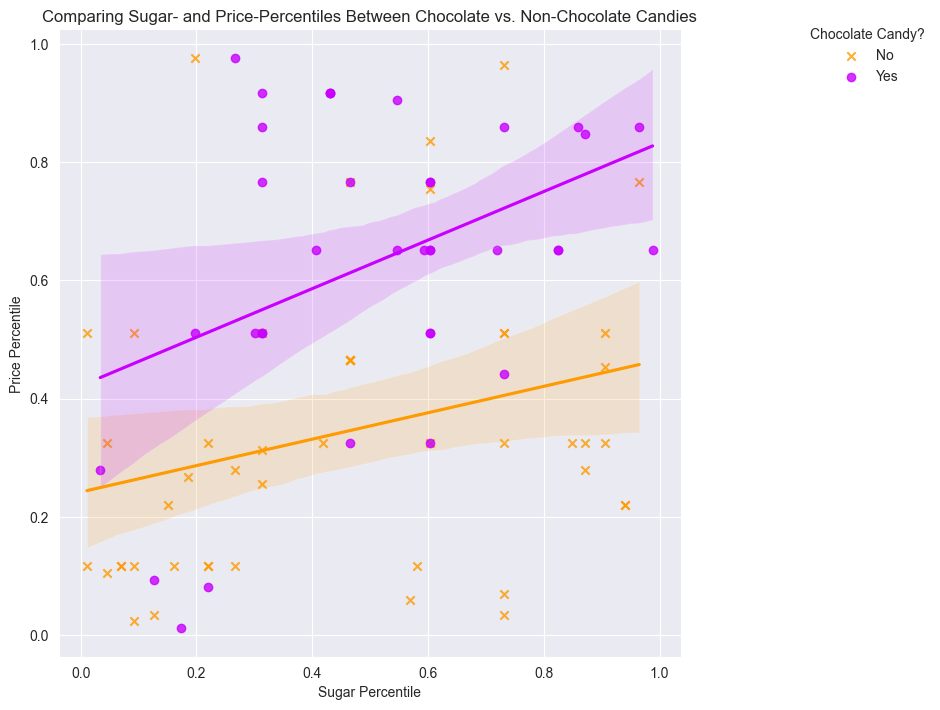

In [116]:
# Creating a scatter plot with Seaborn comparing the price- and sugar-percentiles between chocolate and non-chocolate candies
regressionplot = sb.lmplot(
    data = df_candy, 
    x = 'sugarpercent', 
    y = 'pricepercent', 
    hue = 'chocolate',
    markers = ['x', 'o'],
    height = 7
);

# Adjusting the axes, title, and more of the scatterplot visualization
plt.title('Comparing Sugar- and Price-Percentiles Between Chocolate vs. Non-Chocolate Candies')
# plt.legend(title = 'Chocolate Candy', labels = ['No', 'Yes'], loc = 'upper left')
regressionplot.set_xlabels('Sugar Percentile')
regressionplot.set_ylabels('Price Percentile')
regressionplot.legend.set_title('Chocolate Candy?')
new_legend_labels = ['No', 'Yes']
for text, label in zip(regressionplot._legend.texts, new_legend_labels):
    text.set_text(label)
sb.move_legend(regressionplot, loc = 'upper left', bbox_to_anchor = (1.05, 1))
plt.show()